<a href="https://colab.research.google.com/github/Pratham2474/Logistic_Regression_From_Scratch/blob/main/Logistic_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
#Loading data...
XY_train_df = pd.read_csv('/content/gdrive/MyDrive/logistic_project/train.csv')
X_test_df = pd.read_csv('/content/gdrive/MyDrive/logistic_project/test.csv')
Y_test_df = pd.read_csv('/content/gdrive/MyDrive/logistic_project/gender_submission.csv')
XY_test_df = pd.merge(X_test_df, Y_test_df, on="PassengerId")

In [7]:
XY_train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
XY_test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


Have to handle age column for null values....simply by dropping.

In [9]:
XY_train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#Cleaning and preproces
XY_train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
XY_test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
XY_train_df.dropna(inplace = True)
XY_test_df.dropna(inplace = True)

In [24]:
XY_test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Survived,0


In [25]:
XY_train_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [11]:
XY_train_df['Sex'] = XY_train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
XY_test_df['Sex'] = XY_test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
XY_train_df['Embarked'] = XY_train_df['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)
XY_test_df['Embarked'] = XY_test_df['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

In [12]:
#Seprating the data into train test and converting it into matrices...
X_train = XY_train_df.drop('Survived',axis=1)
Y_train = XY_train_df['Survived']
X_test = XY_test_df.drop('Survived',axis=1)
Y_test = XY_test_df['Survived']

In [13]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [14]:
X_train = X_train.T
Y_train = Y_train.reshape(1,X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1,X_test.shape[1])

In [15]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7, 712)
(1, 712)
(7, 331)
(1, 331)


In [16]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [30]:
X_train.shape[0]


7

In [31]:
X_train.shape[1]

712

In [17]:
def model(X, Y, learning_rate, iterations):
    no_of_samples = X_train.shape[1]
    no_of_features = X_train.shape[0]
    W = np.zeros((no_of_features,1))
    B = 0
    cost_log = []

    for i in range(iterations):
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)

        # Gradient Descent
        dW = (1/no_of_samples)*np.dot(A - Y, X.T)
        dB = (1/no_of_samples)*np.sum(A - Y)
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        # Keeping track of our cost function value
        cost = -(1/no_of_samples)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        cost_log.append(cost)

        if(i%(iterations/10) == 0):
            print("Cost after ", i, "iteration is: ", cost)

    return W, B, cost_log

In [18]:
iterations = 100000
learning_rate = 0.0016
W, B, cost_log = model(X_train, Y_train, learning_rate, iterations)

Cost after  0 iteration is:  0.6931471805599453
Cost after  10000 iteration is:  0.4942641713051453
Cost after  20000 iteration is:  0.4674249475041408
Cost after  30000 iteration is:  0.45910658419256084
Cost after  40000 iteration is:  0.45574816763069786
Cost after  50000 iteration is:  0.4539944659146641
Cost after  60000 iteration is:  0.4528483488011001
Cost after  70000 iteration is:  0.4519766423991995
Cost after  80000 iteration is:  0.45125698730687575
Cost after  90000 iteration is:  0.4506393760538905


In [19]:
print("Weights for features: \n",W)

Weights for features: 
 [[-0.92251887]
 [ 2.57781795]
 [-0.03086007]
 [-0.31465751]
 [-0.07597027]
 [ 0.00435492]
 [ 0.29284379]]


In [20]:
print("Residual or Bias is: ",B)

Residual or Bias is:  1.1929010174854628


Plotting cost against iterations...

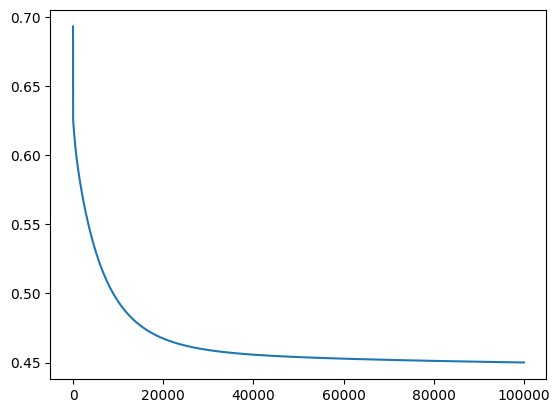

In [21]:
plt.plot(np.arange(iterations), cost_log)
plt.show()

Finding accuracy...

In [22]:
def accuracy(X, Y, W, B):
  Z = np.dot(W.T, X) + B
  A = sigmoid(Z) > 0.5
  A = np.array(A, dtype='int64')
  acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
  return np.sum(A==Y)/Y.shape[1]

In [23]:
accuracy(X_test, Y_test, W, B)

np.float64(0.9486404833836858)

So, the accuracy is approx. 95%...